<a href="https://colab.research.google.com/github/programacaodinamica/mini-projetos/blob/master/src/Extracao_de_dados_Youtube_Data_API_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

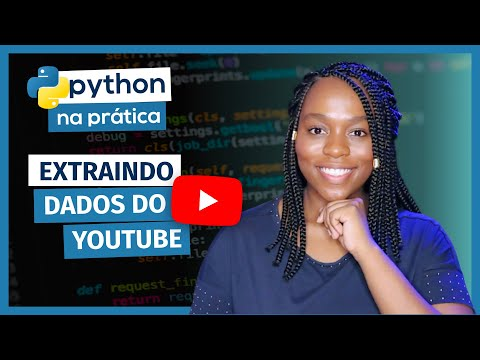

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('olDCJ1w3FLM')

In [ ]:
!pip install --upgrade google-api-python-client

     |████████████████████████████████| 71kB 4.0MB/s 
     |████████████████████████████████| 102kB 4.6MB/s 
  Found existing installation: google-api-core 1.16.0
    Uninstalling google-api-core-1.16.0:
      Successfully uninstalled google-api-core-1.16.0
  Found existing installation: google-api-python-client 1.7.12
    Uninstalling google-api-python-client-1.7.12:
      Successfully uninstalled google-api-python-client-1.7.12


In [ ]:
from googleapiclient.discovery import build

In [ ]:
youTubeApiKey="insira-aqui-sua-chave-de-API"

In [ ]:
youtube = build('youtube','v3', developerKey=youTubeApiKey)

In [ ]:
# Extraindo videos de uma Playlist 
playlistId = 'PL5TJqBvpXQv6SSsEgQrNwpOLTupXPuiMQ' #Dicas de Pandas Playlist
playlistName = 'Dicas de Pandas'
nextPage_token = None

In [ ]:
playlist_videos = []

while True:
  res = youtube.playlistItems().list(part='snippet', playlistId = playlistId, maxResults=50, pageToken=nextPage_token).execute()
  playlist_videos += res['items']
  
  nextPage_token = res.get('nestPageToken')

  if nextPage_token is None:
    break


In [ ]:
playlist_videos 

[{'etag': 'jWlQhc6xyhNF9UAARf5jZ2c6Aw4',
  'id': 'UEw1VEpxQnZwWFF2NlNTc0VnUXJOd3BPTFR1cFhQdWlNUS4yODlGNEE0NkRGMEEzMEQy',
  'kind': 'youtube#playlistItem',
  'snippet': {'channelId': 'UC70mr11REaCqgKke7DPJoLg',
   'channelTitle': 'Programação Dinâmica',
   'description': 'Oi gente, nesse vídeo a Kizzy mostra como fazer conversão de tipos de colunas no Pandas e como você pode formatar uma coluna do tipo object (string) para o tipo numérico float.\n\nPS: Esse é o primeiro vídeo de dicas sobre Pandas. Estamos testando esse novo formato. Espero que gostem! \n#DicaPandas #Python\n\n*Link para o repositório: https://github.com/programacaodinamica/dicas-pandas\n\n*Link para o conjunto de dados utilizado no vídeo: http://www.dados.gov.br/dataset/precos-de-medicamentos-governo\n\n*E-mail: contato@programacaodinamica.com.br\n*Instagram: @dinamicaprogramacao @kizzy_terra @ hallpaz\n*Twitter: @pgdinamica @kizzyterra @hallpaz\n\n* Curta a Programação Dinâmica no facebook: https://fb.com/programacaod

In [ ]:
print("Número total de vídeos na Playlist ", len(playlist_videos))

Número total de vídeos na Playlist  12


In [ ]:
videos_ids = list(map(lambda x: x['snippet']['resourceId']['videoId'], playlist_videos))

In [ ]:
videos_ids

['MVd1cs7TDgA',
 'nsH6H2gNKgg',
 'eUc77KqyThc',
 'a-g36QtGtOg',
 '8Yi3T_CeA9E',
 'Sp9oqlVBgJc',
 'rIwxjCnvdcY',
 '0yyiV4cyYww',
 'Ub5-IMTgeRI',
 '7oMUHy4GGn8',
 'Whm8S0O31Xg',
 'LlXBiniaF7E']

In [ ]:
stats = []

for video_id in videos_ids:
  res = youtube.videos().list(part='statistics', id=video_id).execute()
  stats += res['items']

In [ ]:
stats

[{'etag': 'LrlU4OfPOkJXxNlQ2aQv7PPSegE',
  'id': 'MVd1cs7TDgA',
  'kind': 'youtube#video',
  'statistics': {'commentCount': '138',
   'dislikeCount': '33',
   'favoriteCount': '0',
   'likeCount': '801',
   'viewCount': '13436'}},
 {'etag': 'aBEdgypWJyQOGIEwJKYs6218oj4',
  'id': 'nsH6H2gNKgg',
  'kind': 'youtube#video',
  'statistics': {'commentCount': '55',
   'dislikeCount': '244',
   'favoriteCount': '0',
   'likeCount': '808',
   'viewCount': '21522'}},
 {'etag': '5gzeGthfag0m7Na6Z9rq4t96pns',
  'id': 'eUc77KqyThc',
  'kind': 'youtube#video',
  'statistics': {'commentCount': '36',
   'dislikeCount': '4',
   'favoriteCount': '0',
   'likeCount': '247',
   'viewCount': '1444'}},
 {'etag': 'aK8bxxr8u2ABsB5fO1tMmBM9Hn4',
  'id': 'a-g36QtGtOg',
  'kind': 'youtube#video',
  'statistics': {'commentCount': '21',
   'dislikeCount': '0',
   'favoriteCount': '0',
   'likeCount': '271',
   'viewCount': '1508'}},
 {'etag': 'jxdMEoxkcUSJqSS-c5q8sqKBuTo',
  'id': '8Yi3T_CeA9E',
  'kind': 'youtube

In [ ]:
videos_title = list(map(lambda x: x['snippet']['title'], playlist_videos))
url_thumbnails = list(map(lambda x: x['snippet']['thumbnails']['high']['url'], playlist_videos))
published_date = list(map(lambda x: str(x['snippet']['publishedAt']), playlist_videos)) #conversion from ISO8601 date format
video_description = list(map(lambda x: x['snippet']['description'], playlist_videos))
videoid = list(map(lambda x: x['snippet']['resourceId']['videoId'], playlist_videos))

In [ ]:
liked = list(map(lambda x: int(x['statistics']['likeCount']), stats))
disliked = list(map(lambda x: int(x['statistics']['dislikeCount']), stats))
views = list(map(lambda x: int(x['statistics']['viewCount']), stats))
comment = list(map(lambda x: int(x['statistics']['commentCount']), stats))

In [ ]:
from datetime import datetime 

extraction_date = [str(datetime.now())]*len(videos_ids)

In [ ]:
import pandas as pd

In [ ]:
playlist_df = pd.DataFrame({'title':videos_title,
      'video_id':videoid,
      'video_description':video_description,
      'published_date':published_date,
      'extraction_date':extraction_date,
      'likes':liked,
      'dislikes':disliked,
      'views':views,
      'comment':comment,
      'thumbnail': url_thumbnails})
playlist_df.head()

,title,video_id,video_description,published_date,extraction_date,likes,dislikes,views,comment,thumbnail
0,CONVERTENDO uma coluna de um DataFrame do Pand...,MVd1cs7TDgA,"Oi gente, nesse vídeo a Kizzy mostra como faze...",2020-04-04T20:33:33Z,2021-02-17 00:58:05.210204,801,33,13436,138,https://i.ytimg.com/vi/MVd1cs7TDgA/hqdefault.jpg
1,MODIFICANDO o tamanho das COLUNAS de um DataFr...,nsH6H2gNKgg,"Continuando a série de dicas do Pandas, a Kizz...",2020-04-17T01:44:14Z,2021-02-17 00:58:05.210204,808,244,21522,55,https://i.ytimg.com/vi/nsH6H2gNKgg/hqdefault.jpg
2,ORDENEI o resultado do DataFrame DESCRIBE | Di...,eUc77KqyThc,Mais um vídeo respondendo dúvidas sobre Pandas...,2020-04-25T21:40:02Z,2021-02-17 00:58:05.210204,247,4,1444,36,https://i.ytimg.com/vi/eUc77KqyThc/hqdefault.jpg
3,Descobri um método que VERIFICA se dois conjun...,a-g36QtGtOg,"Nesse vídeo, a Kizzy discute um método pouco c...",2020-05-02T04:04:58Z,2021-02-17 00:58:05.210204,271,0,1508,21,https://i.ytimg.com/vi/a-g36QtGtOg/hqdefault.jpg
4,MUDEI a COR de um DataFrame do Pandas *ficou ...,8Yi3T_CeA9E,Mais uma dica de Pandas 🤩Nesse vídeo você vai ...,2020-05-16T05:43:21Z,2021-02-17 00:58:05.210204,370,1,2245,59,https://i.ytimg.com/vi/8Yi3T_CeA9E/hqdefault.jpg


In [ ]:
!pip install --upgrade gspread

  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [ ]:
from google.colab import auth

import gspread
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
folderId = '1mpMs1AR0HB99U_I-7uimOT5RvZUUVmNU'
spreasheet = gc.create('youtube-data',folder_id=folderId)

In [ ]:
playlist_sheet = spreasheet.add_worksheet(playlistName,rows=12, cols=11)

In [ ]:
playlist_sheet.update([playlist_df.columns.values.tolist()] + playlist_df.values.tolist())

{'spreadsheetId': '11-OfFVwz4q4auf82xQ99nlsRhICrVFFwNaf2tZYSsDM',
 'updatedCells': 130,
 'updatedColumns': 10,
 'updatedRange': "'Dicas de Pandas'!A1:J13",
 'updatedRows': 13}

In [ ]:
subscribers_sheet.append_row([str(datetime.now()),int(subscribers_at_extraction)])